In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv(r'https://raw.githubusercontent.com/sharmapratik88/AIML-Projects/master/03_Ensemble%20Techniques/bank-full.csv')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.shape

(45211, 17)

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [11]:
summary = df.describe().T
summary.loc[:, 'min':'max']                           

,min,25%,50%,75%,max
age,18.0,33.0,39.0,48.0,95.0
balance,-8019.0,72.0,448.0,1428.0,102127.0
day,1.0,8.0,16.0,21.0,31.0
duration,0.0,103.0,180.0,319.0,4918.0
campaign,1.0,1.0,2.0,3.0,63.0
pdays,-1.0,-1.0,-1.0,-1.0,871.0
previous,0.0,0.0,0.0,0.0,275.0


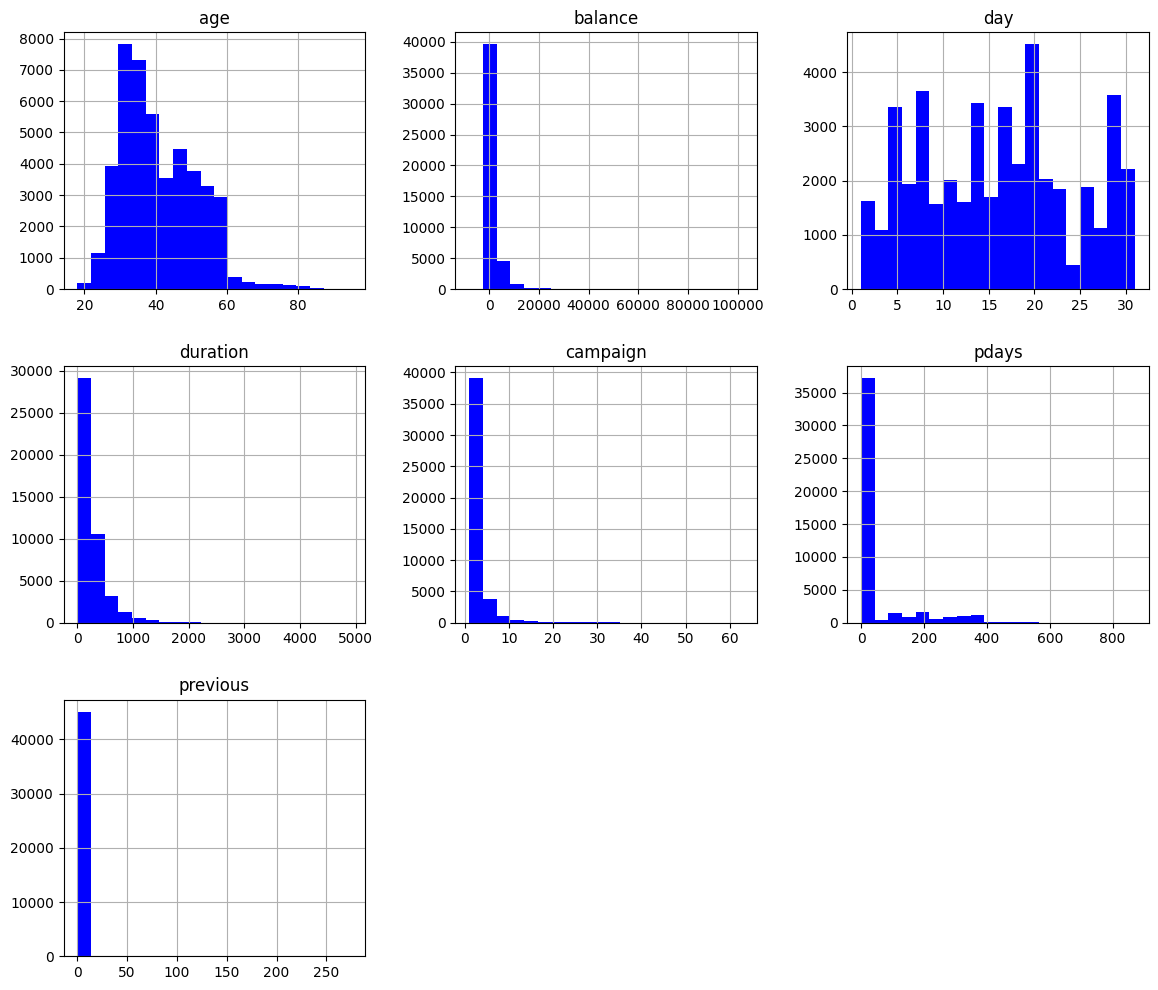

In [12]:
df.hist(bins = 20, figsize = (14,12), color = 'blue')
plt.show()

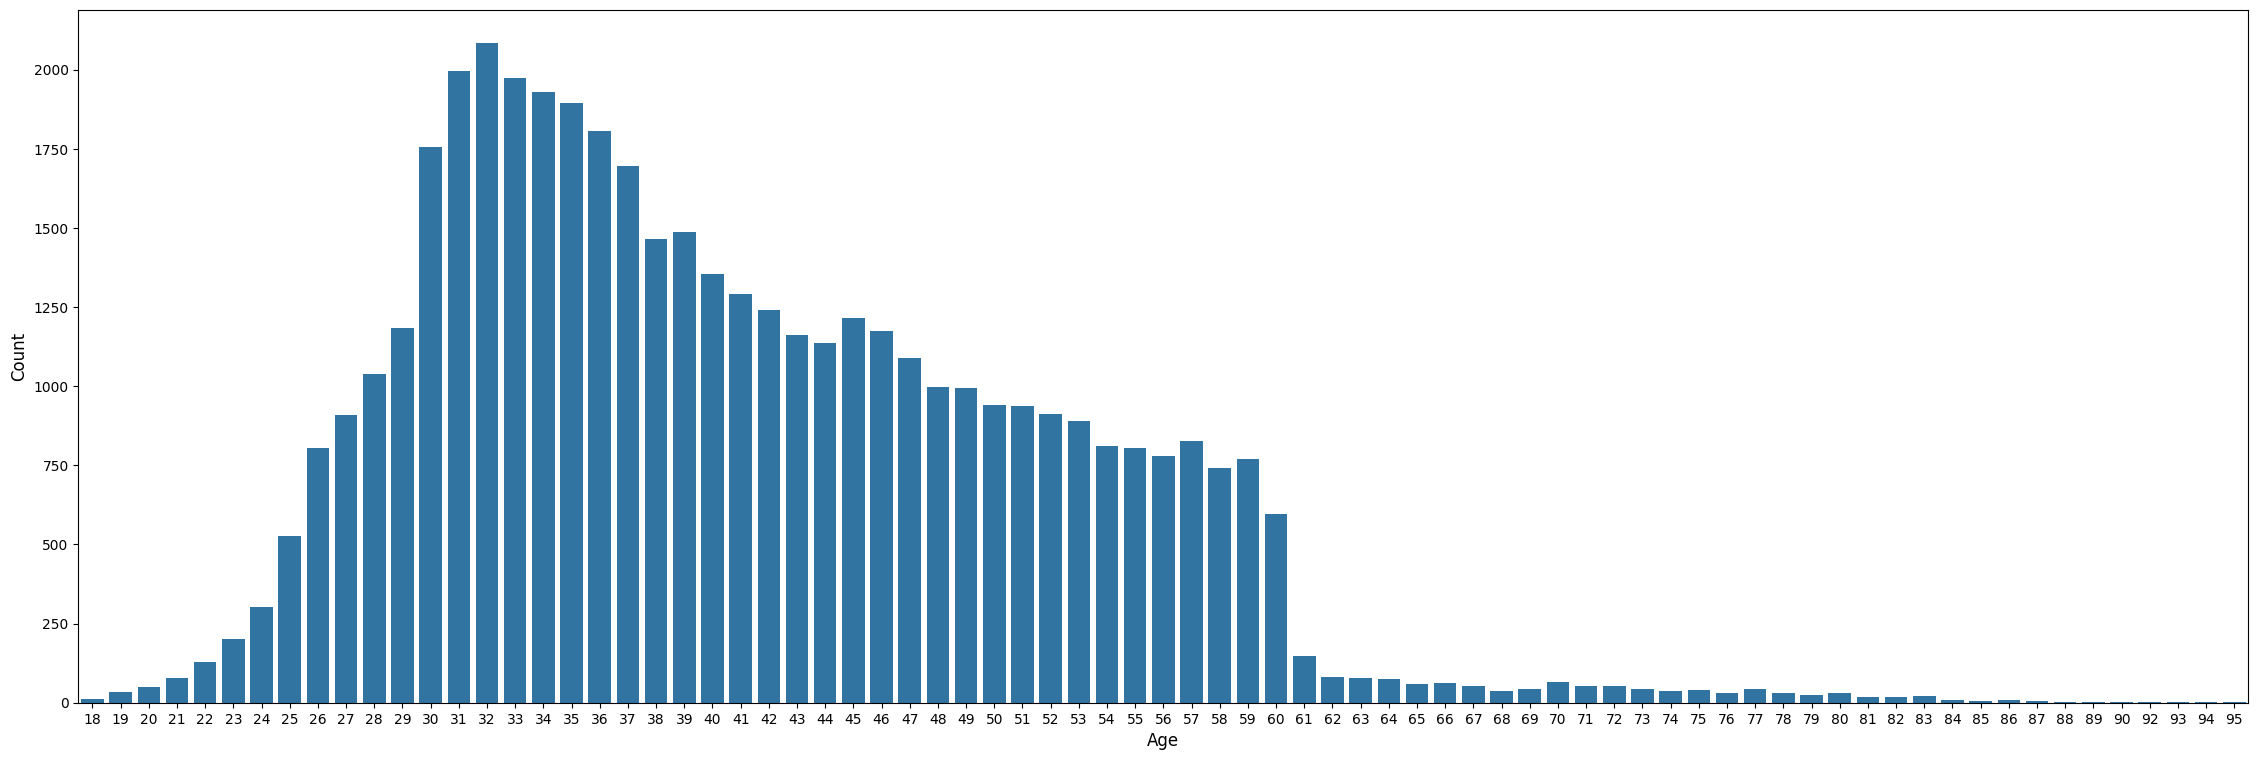

In [13]:
plt.figure(figsize = (28,9))
sns.countplot(x = 'age', data = df)
sns.color_palette("Spectral", as_cmap=True)

plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize =12)
plt.show()

Target
no     39922
yes     5289
Name: count, dtype: int64


<Axes: xlabel='Target'>

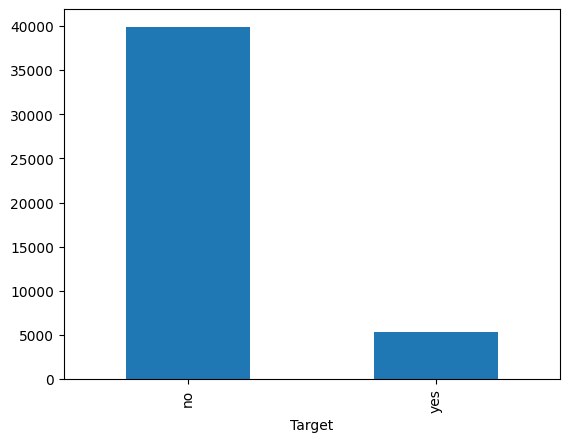

In [14]:
#plt.figure(figsize = (14,6))
print(df['Target'].value_counts())
df.Target.value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'Status of Subscription of Term Deposit')

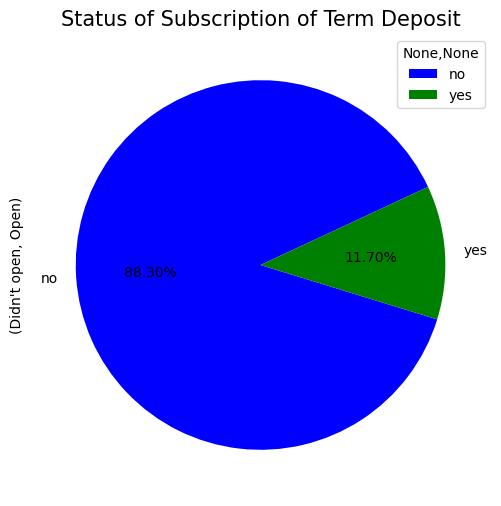

In [15]:
plt.figure(figsize = (12,6))

labels = "Didn't open", "Open"

color = ['blue', 'green']

df['Target'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%', shadow = False, legend = True, colors = color, label = labels, startangle = 25)
plt.title('Status of Subscription of Term Deposit', fontsize = 15)

Text(0.5, 1.0, 'Relation between educational status and balance')

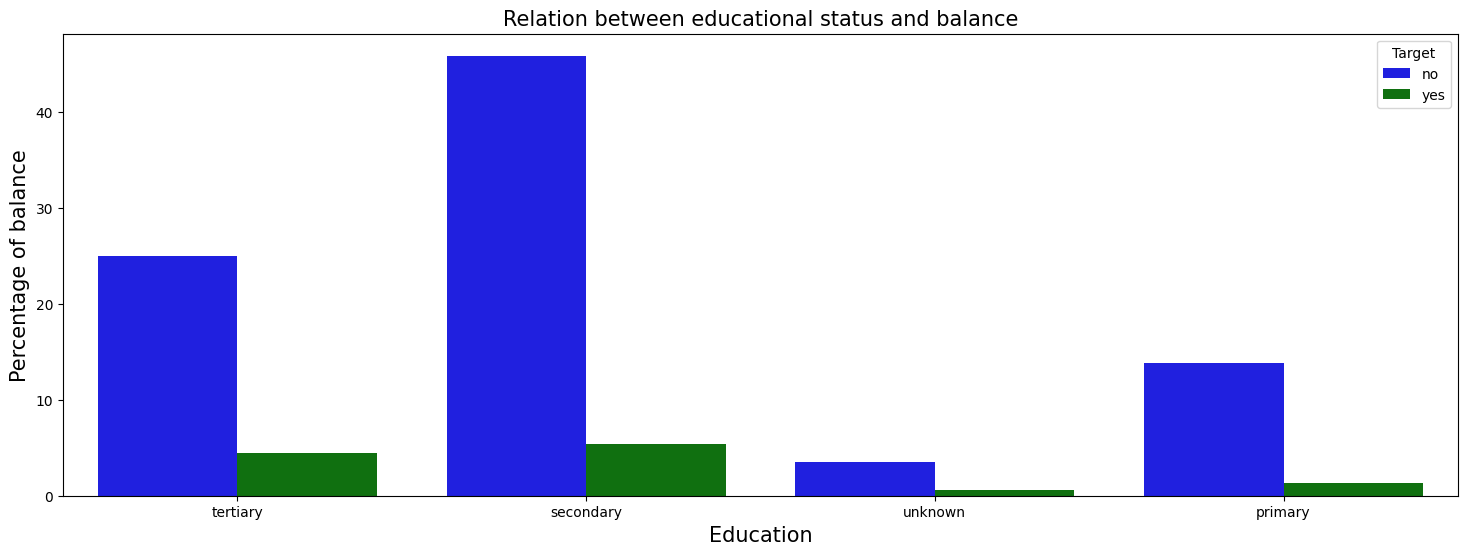

In [16]:
plt.figure(figsize = (18,6))
sns.barplot(x = df['education'], y = df['balance'], hue = 'Target', data = df, palette = color,  estimator = lambda x: len(x) / len(df) * 100)
plt.xlabel('Education', fontsize = 15)
plt.ylabel('Percentage of balance', fontsize = 15)
plt.title('Relation between educational status and balance', fontsize = 15)

Text(0.5, 1.0, 'Boxplot of Duration Column')

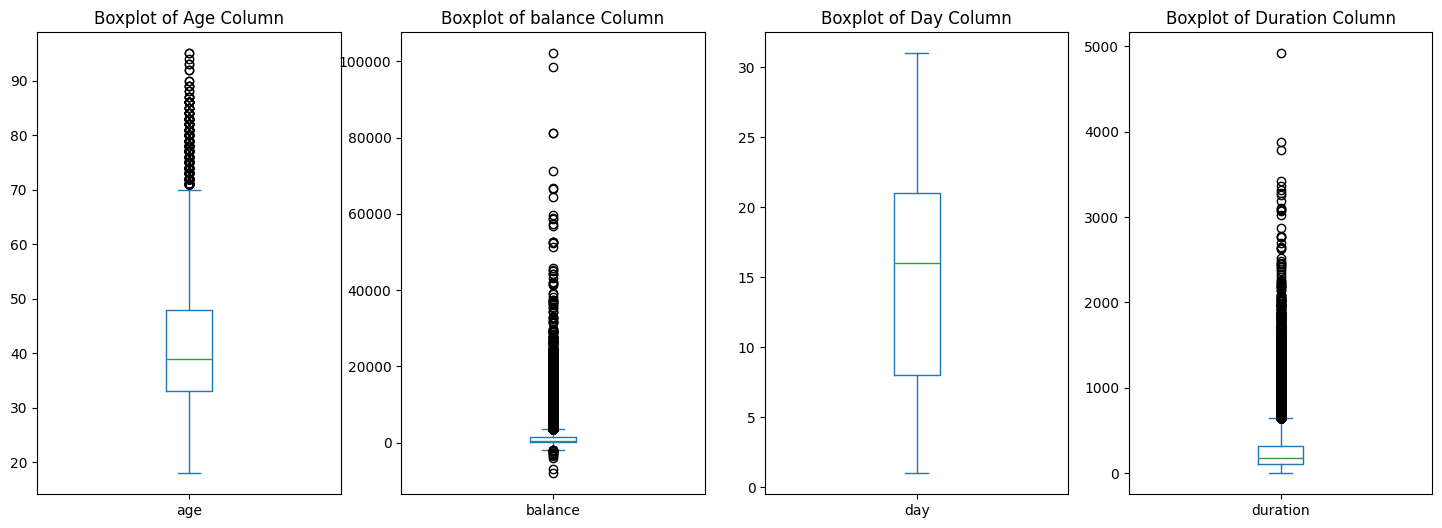

In [17]:
plt.figure(figsize = (18,6))

plt.subplot(1,4,1)
df.age.plot(x = 'age', kind = 'box')
plt.title('Boxplot of Age Column')

plt.subplot(1,4,2)
df.balance.plot(x = 'balance', kind = 'box')
plt.title('Boxplot of balance Column')

plt.subplot(1,4,3)
df.day.plot(x = 'day', kind = 'box')
plt.title('Boxplot of Day Column')

plt.subplot(1,4,4)
df.duration.plot(x = 'duration', kind = 'box')
plt.title('Boxplot of Duration Column')

Text(0.5, 1.0, 'Boxplot of Previous Column')

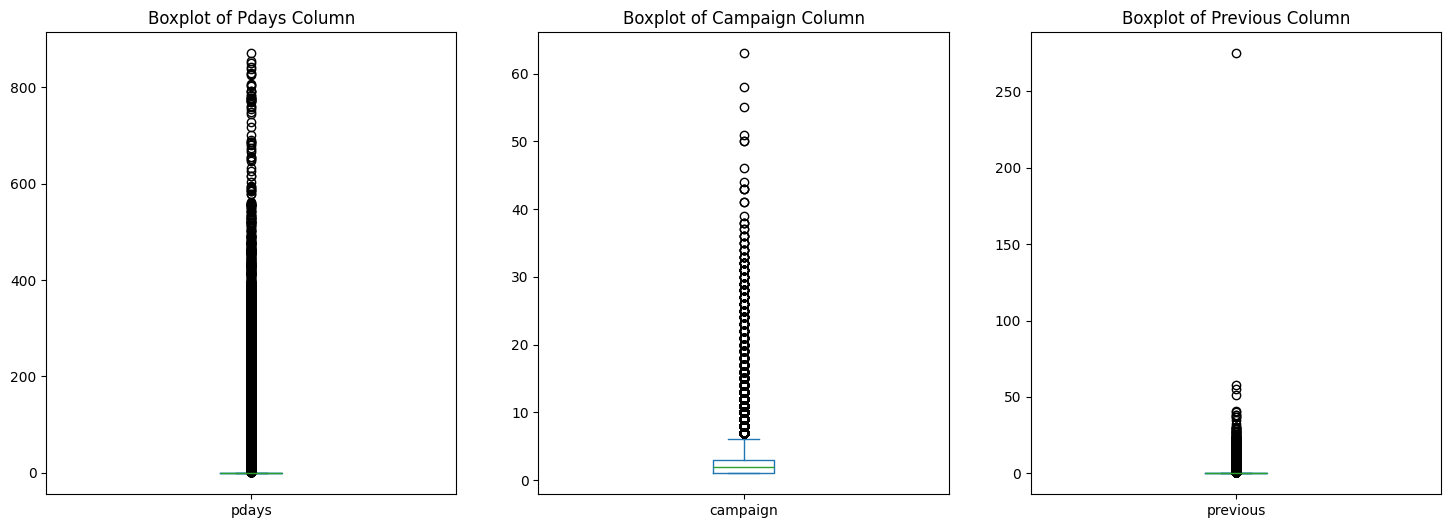

In [18]:
plt.figure(figsize = (18,6))

plt.subplot(1,3,1)
df.pdays.plot(x = 'pdays', kind = 'box')
plt.title('Boxplot of Pdays Column')

plt.subplot(1,3,2)
df.campaign.plot(x = 'campaign', kind = 'box')
plt.title('Boxplot of Campaign Column')

plt.subplot(1,3,3)
df.previous.plot(x = 'previous', kind = 'box')
plt.title('Boxplot of Previous Column')

In [19]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = pd.Categorical(df[i])
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

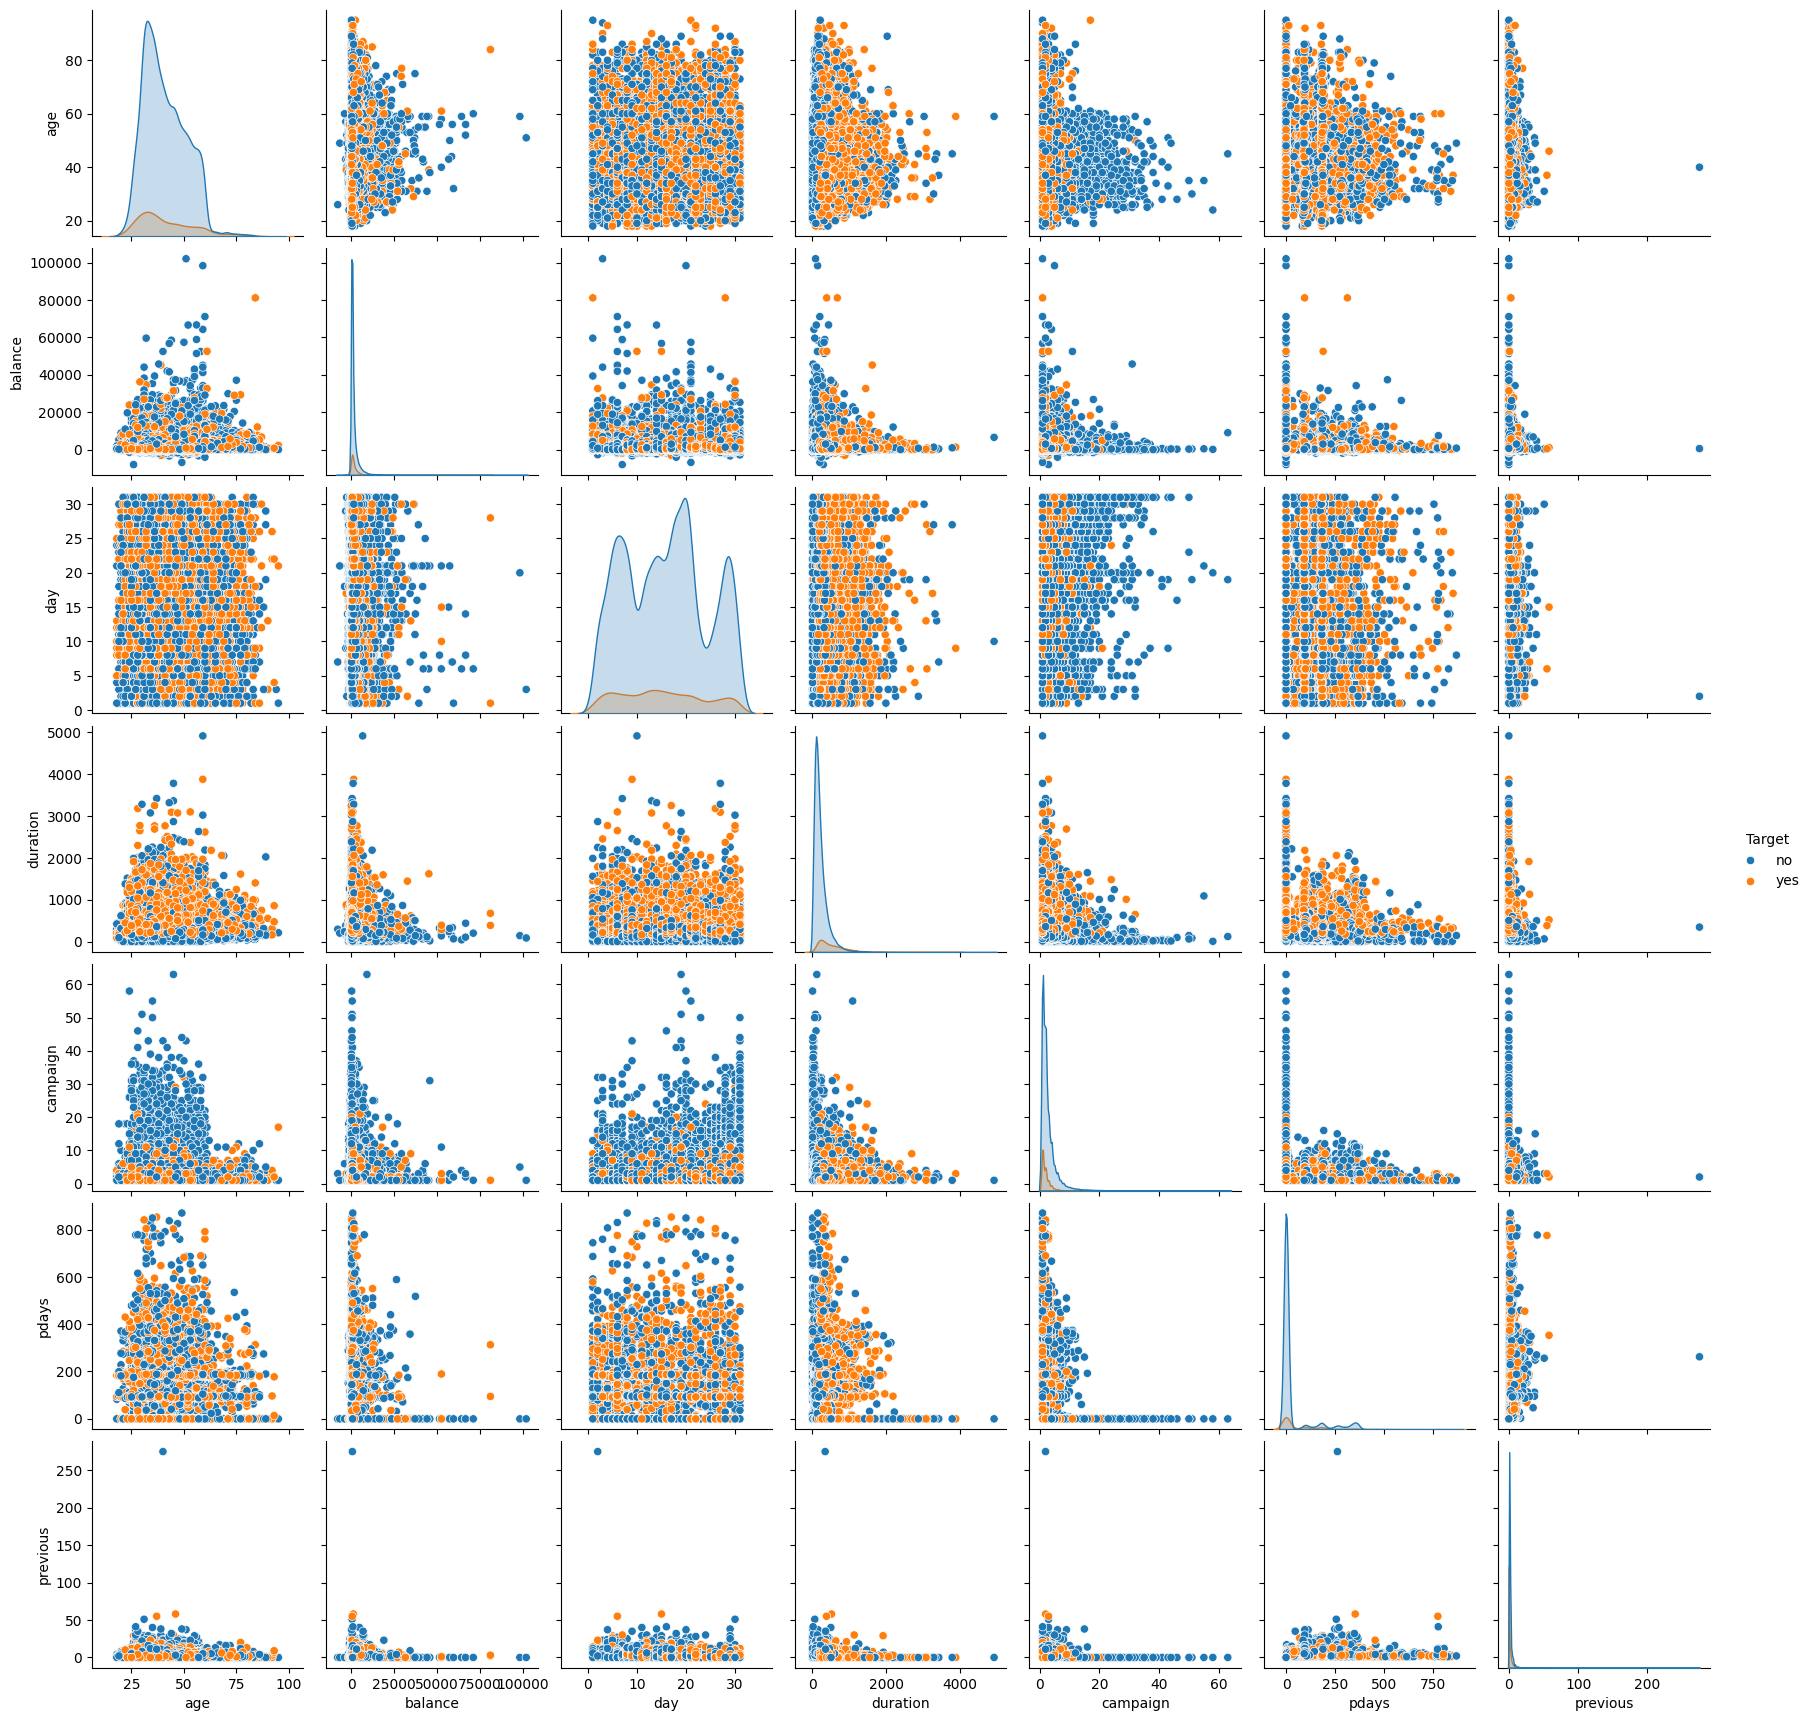

In [20]:
sns.pairplot(df, diag_kind = 'kde', hue = 'Target')

In [21]:
dfs = df.copy(deep = 'True')

In [22]:
en = LabelEncoder()

for i in dfs.columns:
    if dfs[i].dtype != 'int':
        dfs[i] = en.fit_transform(dfs[i]).astype(int)
dfs.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


<Axes: >

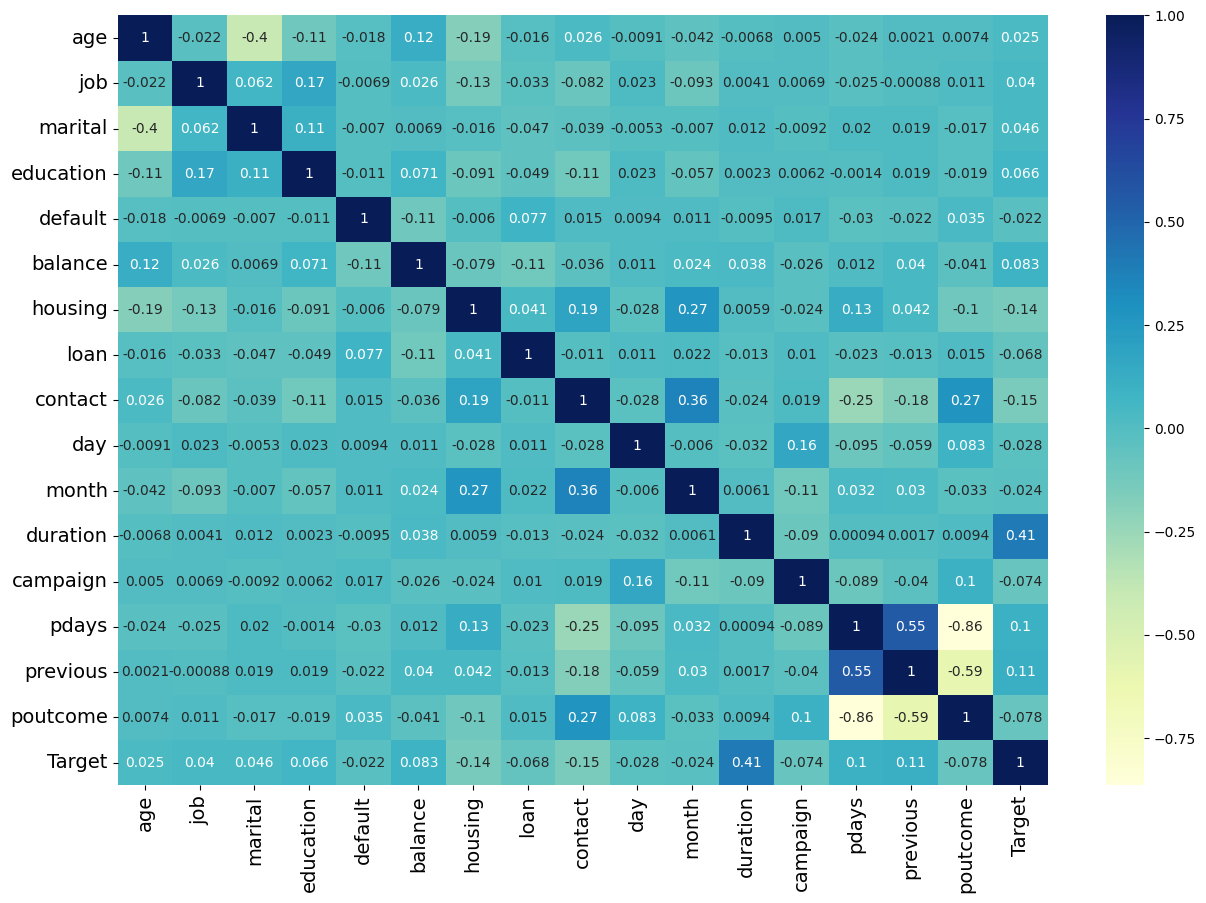

In [23]:
corr = dfs.corr()
plt.figure(figsize = (15,10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
sns.heatmap(corr, annot= True, cmap = 'YlGnBu')

In [24]:
x = dfs.loc[:, dfs.columns != 'Target']
y = dfs.Target

In [25]:
xcol = x.columns

Text(0.5, 1.0, 'Correlation with Target')

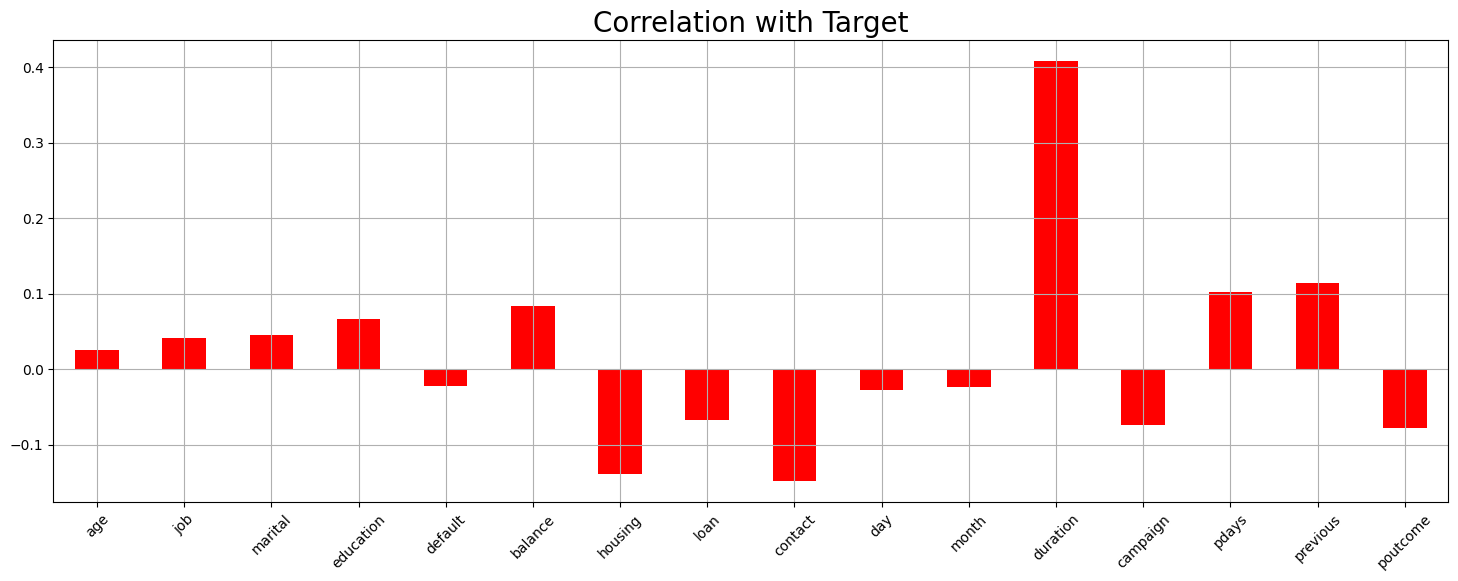

In [26]:
x.corrwith(y).plot.bar(color = 'red', figsize = (18,6), rot = 45, grid = True)
plt.title('Correlation with Target', fontsize = 20)

In [27]:
xstd = pd.DataFrame(StandardScaler().fit_transform(x))
xstd.columns = xcol
xstd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.607094,-0.103820,-0.275762,1.036362,-0.13549,0.732955,0.893915,-0.436803,1.514306,-1.298476,0.823773,0.023623,-0.57297,-0.414317,-0.305354,0.444898
1,0.288564,1.424008,1.368372,-0.300556,-0.13549,-0.695795,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.435364,-0.57297,-0.414317,-0.305354,0.444898
2,-0.747423,-0.714951,-0.275762,-0.300556,-0.13549,-0.714243,0.893915,2.289359,1.514306,-1.298476,0.823773,-0.748309,-0.57297,-0.414317,-0.305354,0.444898
3,0.571107,-1.020516,-0.275762,2.373280,-0.13549,0.312051,0.893915,-0.436803,1.514306,-1.298476,0.823773,-0.681548,-0.57297,-0.414317,-0.305354,0.444898
4,-0.747423,2.035139,1.368372,2.373280,-0.13549,-0.714927,-1.118674,-0.436803,1.514306,-1.298476,0.823773,-0.239251,-0.57297,-0.414317,-0.305354,0.444898


In [28]:
x_train, x_test, y_train, y_test = train_test_split(xstd, y, random_state = 10, test_size = 0.3)
x_train.shape

(31647, 16)

In [29]:
x_test.shape

(13564, 16)

## Gaussian NB

Train Score:  0.8364773912219168
Test Score:  0.8374373341197286
Confusion matrix:
[[10533  1473]
 [  732   826]]

classification report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     12006
           1       0.36      0.53      0.43      1558

    accuracy                           0.84     13564
   macro avg       0.65      0.70      0.67     13564
weighted avg       0.87      0.84      0.85     13564


accuracy score:
0.8374373341197286



Text(0.5, 1.0, 'Confusion Matrix HeatMap of Gaussian Naive Bayes Model')

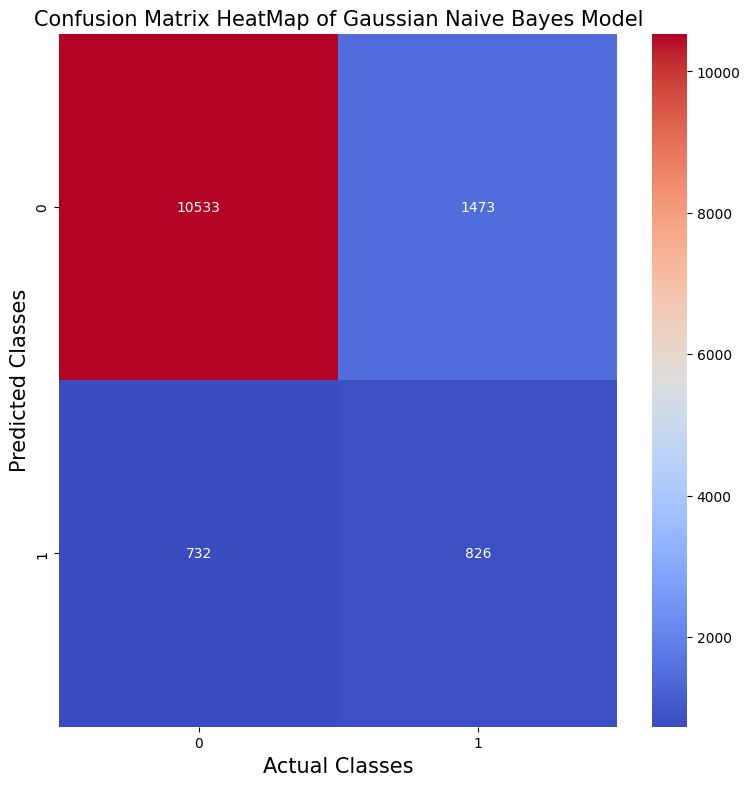

In [31]:
gb = GaussianNB()
gb.fit(x_train, y_train)

y_pred, y_true = gb.predict(x_test), y_test

score_train = gb.score(x_train, y_train)
print("Train Score: ", score_train)
score_test = gb.score(x_test, y_test)
print("Test Score: ", score_test)

cfm = confusion_matrix(y_true, y_pred)
score = accuracy_score(y_true, y_pred)

print("Confusion matrix:\n{}\n".format(cfm))
print("classification report:\n{}\n".format(classification_report(y_true, y_pred)))
print("accuracy score:\n{}\n".format(score))

plt.figure(figsize = (9,9))
sns.heatmap(cfm, annot = True, cmap = 'coolwarm', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Gaussian Naive Bayes Model', fontsize = 15)

In [32]:
precision_score_nb, f1_score_nb, recall_nb, support = precision_recall_fscore_support(y_test, y_pred, average = 'macro') 
print("Precision score: {:.2f}".format(precision_score_nb))
print("F1 score: {:.2f}".format(f1_score_nb))
print("Recall score: {:.2f}".format(recall_nb))
print("Accuracy score: {:.2f}".format(accuracy_score(y_true, y_pred)))

Precision score: 0.65
F1 score: 0.70
Recall score: 0.67
Accuracy score: 0.84


## Logistic Regression

        age       job   marital  education   default  balance   housing  \
0  0.055704  0.019323  0.127135   0.137608 -0.029892  0.14325 -0.516224   

       loan   contact       day     month  duration  campaign     pdays  \
0 -0.248539 -0.578934 -0.063072  0.106732  1.003016 -0.394144  0.322745   

   previous  poutcome  intercept  
0  0.209131  0.218846  -2.715521  
Train Score:  0.8903529560463868
Test Score:  0.8928782070185786
Confusion matrix:
[[11740   266]
 [ 1187   371]]

classification report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12006
           1       0.58      0.24      0.34      1558

    accuracy                           0.89     13564
   macro avg       0.75      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564


accuracy score:
0.8928782070185786



Text(0.5, 1.0, 'Confusion Matrix HeatMap of Logistic Regression Model')

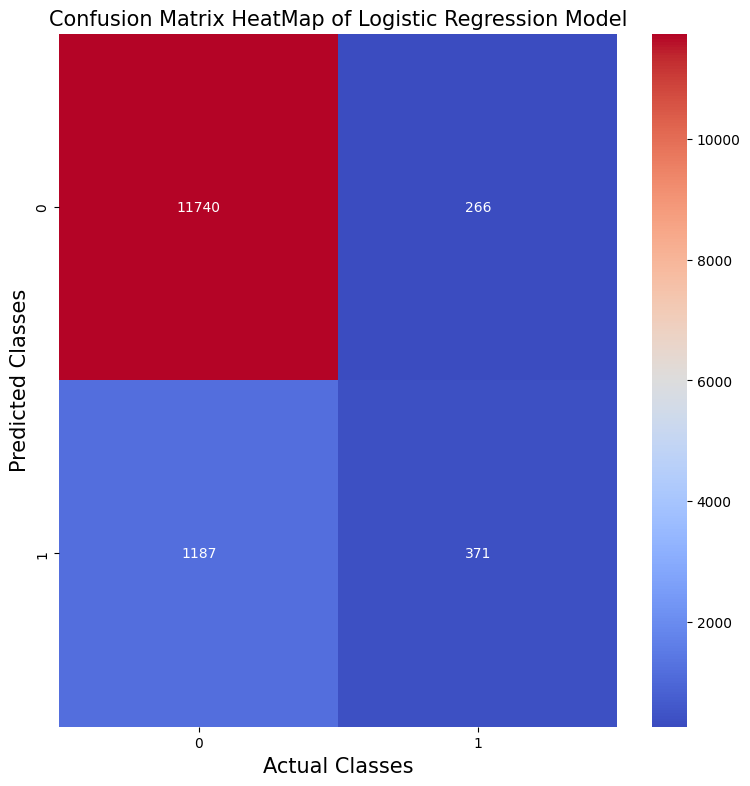

In [34]:
lr = LogisticRegression(C=0.1, solver = 'liblinear')
lr.fit(x_train, y_train)

y_pred, y_true = lr.predict(x_test), y_test

coef_df = pd.DataFrame(lr.coef_, columns = xcol)
coef_df['intercept'] = lr.intercept_
print(coef_df)

score_train = lr.score(x_train, y_train)
print("Train Score: ", score_train)
score_test = lr.score(x_test, y_test)
print("Test Score: ", score_test)

cfm = confusion_matrix(y_true, y_pred)
score = accuracy_score(y_true, y_pred)

print("Confusion matrix:\n{}\n".format(cfm))
print("classification report:\n{}\n".format(classification_report(y_true, y_pred)))
print("accuracy score:\n{}\n".format(score))

plt.figure(figsize = (9,9))
sns.heatmap(cfm, annot = True, cmap = 'coolwarm', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Logistic Regression Model', fontsize = 15)

In [35]:
precision_score_lr, f1_score_lr, recall_lr, support = precision_recall_fscore_support(y_test, y_pred, average = 'macro') 
print("Precision score: {:.2f}".format(precision_score_lr))
print("F1 score: {:.2f}".format(f1_score_lr))
print("Recall score: {:.2f}".format(recall_lr))
print("Accuracy score: {:.2f}".format(accuracy_score(y_true, y_pred)))

Precision score: 0.75
F1 score: 0.61
Recall score: 0.64
Accuracy score: 0.89


## Support Vector Classifier

Train Score:  0.90687900906879
Test Score:  0.9013565319964613
Confusion matrix:
[[11740   266]
 [ 1187   371]]

classification report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12006
           1       0.58      0.24      0.34      1558

    accuracy                           0.89     13564
   macro avg       0.75      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564


accuracy score:
0.8928782070185786



Text(0.5, 1.0, 'Confusion Matrix HeatMap of SVC Model')

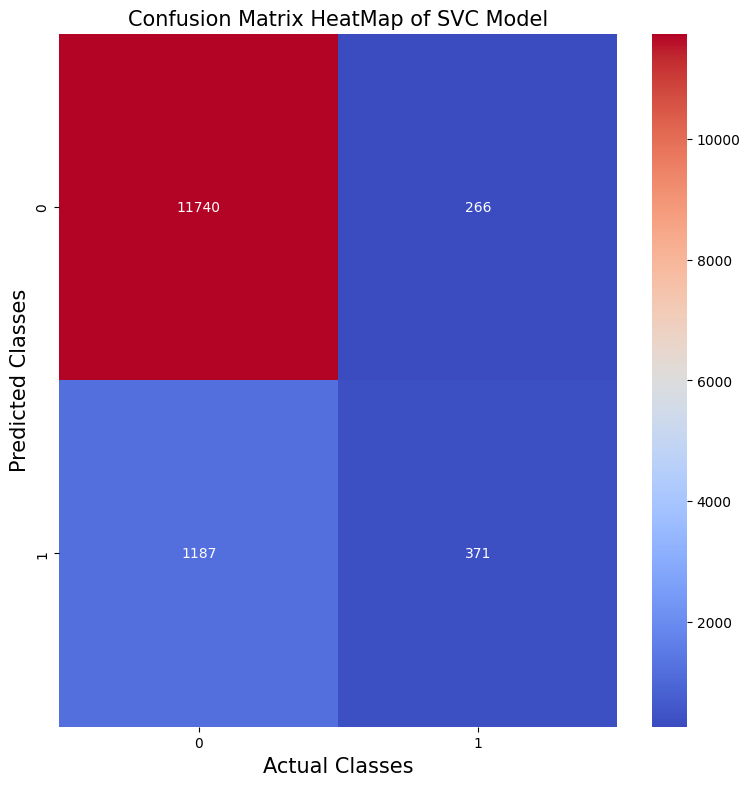

In [37]:
svc = SVC(kernel = 'rbf', gamma = 'scale') 

svc.fit(x_train, y_train)

y_pred, y_true = lr.predict(x_test), y_test

score_train = svc.score(x_train, y_train)
print("Train Score: ", score_train)
score_test = svc.score(x_test, y_test)
print("Test Score: ", score_test)

cfm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:\n{}\n".format(cfm))
print("classification report:\n{}\n".format(classification_report(y_true, y_pred)))
print("accuracy score:\n{}\n".format(accuracy_score(y_true, y_pred)))

plt.figure(figsize = (9,9))
sns.heatmap(cfm, annot = True, cmap = 'coolwarm', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of SVC Model', fontsize = 15)

In [38]:
precision_score_svc, f1_score_svc, recall_svc, support = precision_recall_fscore_support(y_test, y_pred, average = 'macro') 
print("Precision score: {:.2f}".format(precision_score_svc))
print("F1 score: {:.2f}".format(f1_score_svc))
print("Recall score: {:.2f}".format(recall_svc))
print("Accuracy score: {:.2f}".format(accuracy_score(y_true, y_pred)))

Precision score: 0.75
F1 score: 0.61
Recall score: 0.64
Accuracy score: 0.89


## KNN

In [40]:
l = list(range(1,30))
n = list(filter(lambda x: x % 2 != 0, l))

In [41]:
acs = []

for i in n:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    y_true = y_test
    scores = accuracy_score(y_true, y_pred)
    acs.append(scores)

MSE = [1 - x for x in acs]
optimal_k = n[MSE.index(min(MSE))]
print(optimal_k)

29


Train Score:  0.8984105918412488
Test Score:  0.8975965791801829

Confusion matrix:

 [[11823   183]
 [ 1206   352]]
Classification report:               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12006
           1       0.66      0.23      0.34      1558

    accuracy                           0.90     13564
   macro avg       0.78      0.61      0.64     13564
weighted avg       0.88      0.90      0.87     13564



Accuracy Score: 

 0.8975965791801829


Text(0.5, 1.0, 'Confusion Matrix HeatMap of KNN Model')

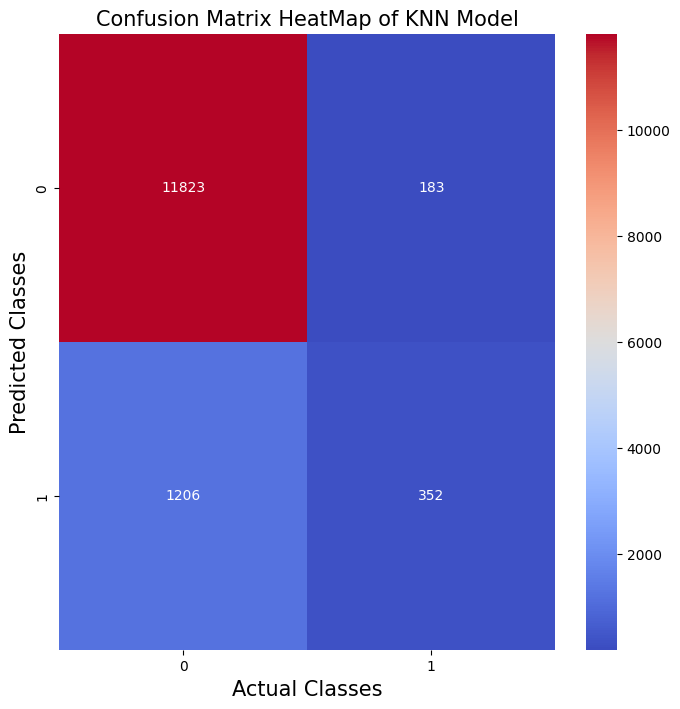

In [42]:
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_true = y_test

score_train = knn.score(x_train, y_train)
print("Train Score: ", score_train)
score_test = knn.score(x_test, y_test)
print("Test Score: ", score_test)

cfm = confusion_matrix(y_true, y_pred)
score = accuracy_score(y_true, y_pred)

print("\nConfusion matrix:\n\n",cfm)
print("Classification report: {}\n\n".format(classification_report(y_true, y_pred)))
print("Accuracy Score: \n\n",score)

plt.figure(figsize = (8,8))
sns.heatmap(cfm, annot = True, cmap = 'coolwarm', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of KNN Model', fontsize = 15)

In [43]:
precision_score_knn, recall_knn, f1_score_knn, support = precision_recall_fscore_support(y_true, y_pred, average = 'macro')
print("Precision Score: {:.2f}".format(precision_score_knn))
print("Recall score: {:.2f}".format(recall_knn))
print("F1 Score: {:.2f}".format(f1_score_knn))
print("Accuracy Score: {:.2f}".format(accuracy_score(y_true, y_pred)))

Precision Score: 0.78
Recall score: 0.61
F1 Score: 0.64
Accuracy Score: 0.90


In [44]:
models = []
models.append(['Gaussian NB', score_train * 100, score * 100, recall_nb * 100, precision_score_nb * 100])
models.append(['Logistic Regression', score_train * 100, score * 100, recall_lr * 100, precision_score_lr * 100])
models.append(['SVC', score_train * 100, score * 100, recall_svc * 100, precision_score_svc * 100])
models.append(['KNN', score_train * 100, score * 100, recall_knn * 100, precision_score_knn * 100])
model_df = pd.DataFrame(models, columns = ['Model', 'Train Score', 'Test Score', 'Recall Score', 'Precision Score'])
model_df

,Model,Train Score,Test Score,Recall Score,Precision Score
0,Gaussian NB,89.841059,89.759658,66.677952,64.715331
1,Logistic Regression,89.841059,89.759658,63.988241,74.529713
2,SVC,89.841059,89.759658,63.988241,74.529713
3,KNN,89.841059,89.759658,60.534415,78.269059


# Decision Tree Classifier

Accuracy score of Training data:  0.8942395803709672
Accuracy score of Testing data:  0.8950899439693306

Mean Absolute Error of Decision Tree Model:0.10491005603066941



Confusion matrix:

 [[11741   265]
 [ 1158   400]]
Classification report:               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12006
           1       0.60      0.26      0.36      1558

    accuracy                           0.90     13564
   macro avg       0.76      0.62      0.65     13564
weighted avg       0.87      0.90      0.88     13564



Accuracy Score: 

 0.8950899439693306


Text(0.5, 1.0, 'Confusion Matrix HeatMap of Decision Tree Model')

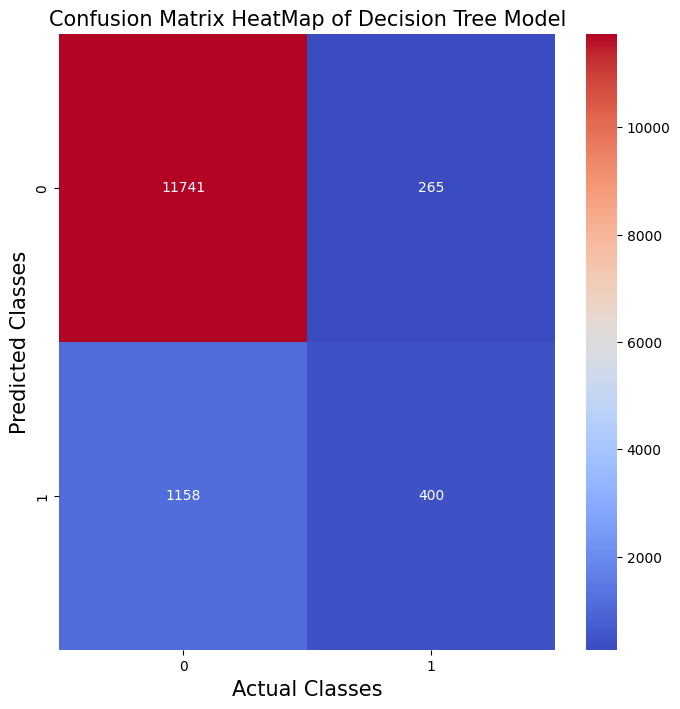

In [46]:
dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 5, max_depth = 5)
dt.fit(x_train, y_train)

score_train = dt.score(x_train, y_train)
print("Accuracy score of Training data: ", score_train)
score_test = dt.score(x_test, y_test)
print("Accuracy score of Testing data: ", score_test)

y_true = y_test
y_pred = dt.predict(x_test)
cfm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)

print("\nMean Absolute Error of Decision Tree Model:{}\n\n".format(mean_absolute_error(y_test, y_pred)))
print("\nConfusion matrix:\n\n",cfm)
print("Classification report: {}\n\n".format(classification_report(y_true, y_pred)))
print("Accuracy Score: \n\n",score)

plt.figure(figsize = (8,8))
sns.heatmap(cfm, annot = True, cmap = 'coolwarm', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Decision Tree Model', fontsize = 15)

In [47]:
precision_score_dt, recall_dt, f1_score_dt, support = precision_recall_fscore_support(y_true, y_pred, average = 'macro')
print("Precision Score: {:.2f}".format(precision_score_dt))
print("Recall score: {:.2f}".format(recall_dt))
print("F1 Score: {:.2f}".format(f1_score_dt))
print("Accuracy Score: {:.2f}".format(accuracy_score(y_true, y_pred)))

Precision Score: 0.76
Recall score: 0.62
F1 Score: 0.65
Accuracy Score: 0.90


           Feature Importance
job                  0.000000
marital              0.000000
education            0.000000
default              0.000000
loan                 0.000000
previous             0.000000
balance              0.002293
campaign             0.002920
day                  0.003431
age                  0.003756
poutcome             0.011730
month                0.060016
pdays                0.076897
housing              0.078749
contact              0.156380
duration             0.603828


Text(0.5, 1.0, 'Determining Feature Improtance with Decision Tree Classifier')

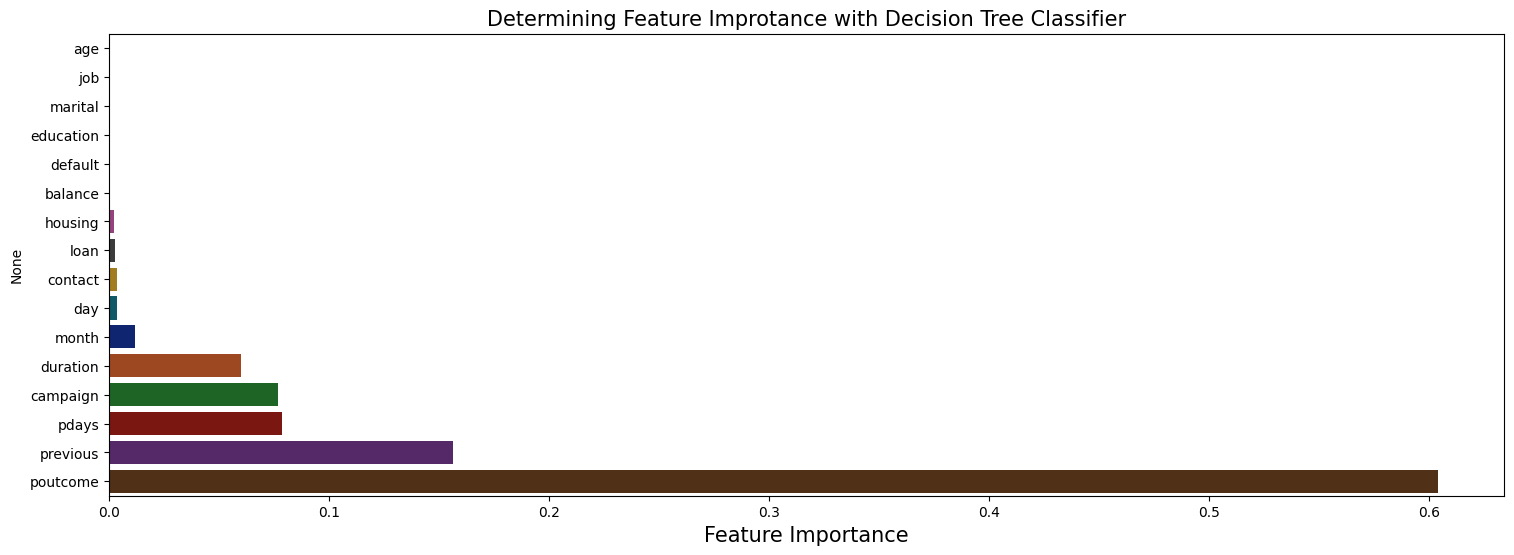

In [48]:
fi = pd.DataFrame(dt.feature_importances_, columns = ['Feature Importance'], index = xcol)
fi_dt = fi.sort_values(by = 'Feature Importance', ascending = True)
print(fi_dt)

plt.figure(figsize = (18,6))
sns.barplot(x = fi_dt['Feature Importance'], y = x_train.columns, palette = 'dark')
plt.xlabel('Feature Importance', fontsize = 15)
plt.title('Determining Feature Improtance with Decision Tree Classifier', fontsize = 15)

# ADA Boost Classifier

Accuracy score of training data: 0.9451132808797043
Accuracy score of testing data: 0.8977440283102329

Mean Absolute Error of AdaBoost Classification Model:
 0.10225597168976704

Classification report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     12006
           1       0.57      0.47      0.51      1558

    accuracy                           0.90     13564
   macro avg       0.75      0.71      0.73     13564
weighted avg       0.89      0.90      0.89     13564




Confusion matrix
[[11441   565]
 [  822   736]]



Accuracy Score
 0.8977440283102329




Text(0.5, 1.0, 'Confusion Matrix HeatMap of ADA Boost Classifier Model')

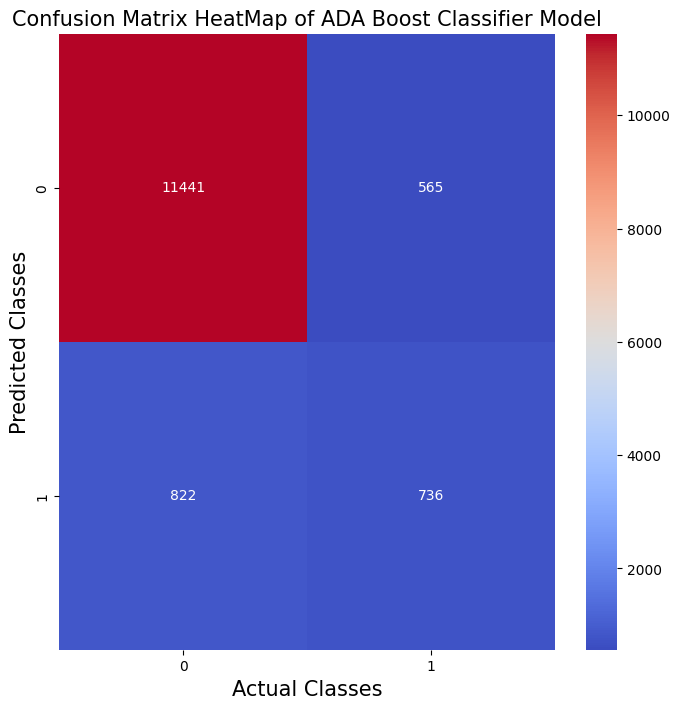

In [50]:
abc = AdaBoostClassifier(base_estimator = dt, n_estimators = 50)
abc.fit(x_train,y_train)

print("Accuracy score of training data: {}".format(abc.score(x_train, y_train)))
print("Accuracy score of testing data: {}".format(abc.score(x_test, y_test)))

y_true = y_test
y_pred = abc.predict(x_test)

cfm = confusion_matrix(y_true, y_pred)
score = accuracy_score(y_true, y_pred)
print('\nMean Absolute Error of AdaBoost Classification Model:\n', mean_absolute_error(y_test, y_pred))
print("\nClassification report\n{}\n\n".format(classification_report(y_true, y_pred)))
print("\nConfusion matrix\n{}\n\n".format(cfm))
print("\nAccuracy Score\n {}\n\n".format(accuracy_score(y_true, y_pred)))

plt.figure(figsize = (8,8))
sns.heatmap(cfm, annot = True, cmap = 'coolwarm', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of ADA Boost Classifier Model', fontsize = 15)

In [51]:
precision_score_abc, recall_abc, f1_score_abc, support = precision_recall_fscore_support(y_true, y_pred, average = 'macro')
print("Precision Score: {:.2f}".format(precision_score_abc))
print("Recall score: {:.2f}".format(recall_abc))
print("F1 Score: {:.2f}".format(f1_score_abc))
print("Accuracy Score: {:.2f}".format(accuracy_score(y_true, y_pred)))

Precision Score: 0.75
Recall score: 0.71
F1 Score: 0.73
Accuracy Score: 0.90


# Bagging Classifier


Accuracy score of training data: 0.9034031661768888
Accuracy score of testing data: 0.9025361250368623

Mean Absolute Error of AdaBoost Classification Model:
 0.09746387496313771

Classification report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12006
           1       0.65      0.32      0.43      1558

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564




Confusion matrix
[[11736   270]
 [ 1052   506]]



Accuracy Score
 0.9025361250368623




Text(0.5, 1.0, 'Confusion Matrix HeatMap of Bagging Classifier Model')

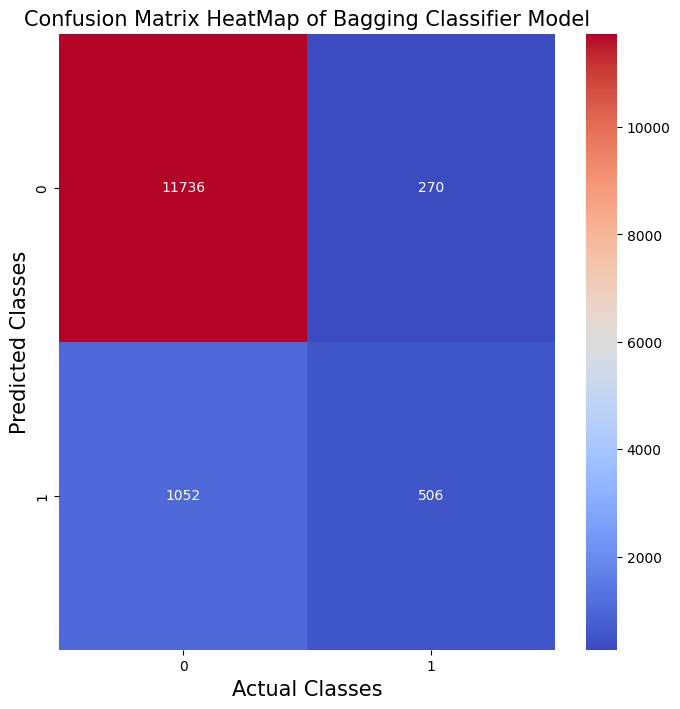

In [53]:
bag = BaggingClassifier(base_estimator = dt, n_estimators = 50)
bag.fit(x_train,y_train)

print("Accuracy score of training data: {}".format(bag.score(x_train, y_train)))
print("Accuracy score of testing data: {}".format(bag.score(x_test, y_test)))

y_true = y_test
y_pred = bag.predict(x_test)

cfm = confusion_matrix(y_true, y_pred)
score = accuracy_score(y_true, y_pred)
print('\nMean Absolute Error of AdaBoost Classification Model:\n', mean_absolute_error(y_test, y_pred))
print("\nClassification report\n{}\n\n".format(classification_report(y_true, y_pred)))
print("\nConfusion matrix\n{}\n\n".format(cfm))
print("\nAccuracy Score\n {}\n\n".format(accuracy_score(y_true, y_pred)))

plt.figure(figsize = (8,8))
sns.heatmap(cfm, annot = True, cmap = 'coolwarm', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Bagging Classifier Model', fontsize = 15)

In [54]:
precision_score_bag, recall_bag, f1_score_bag, support = precision_recall_fscore_support(y_true, y_pred, average = 'macro')
print("Precision Score: {:.2f}".format(precision_score_bag))
print("Recall score: {:.2f}".format(recall_bag))
print("F1 Score: {:.2f}".format(f1_score_bag))
print("Accuracy Score: {:.2f}".format(accuracy_score(y_true, y_pred)))

Precision Score: 0.78
Recall score: 0.65
F1 Score: 0.69
Accuracy Score: 0.90


# Random Forest Classifier

Accuracy score of training data: 0.8821057288210573
Accuracy score of testing data: 0.8851371276909467

Mean Absolute Error of AdaBoost Classification Model:
 0.11486287230905337

Classification report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12006
           1       0.00      0.00      0.00      1558

    accuracy                           0.89     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.89      0.83     13564




Confusion matrix
[[12006     0]
 [ 1558     0]]



Accuracy Score
 0.8851371276909467




Text(0.5, 1.0, 'Confusion Matrix HeatMap of # Random Forest Classifier Model')

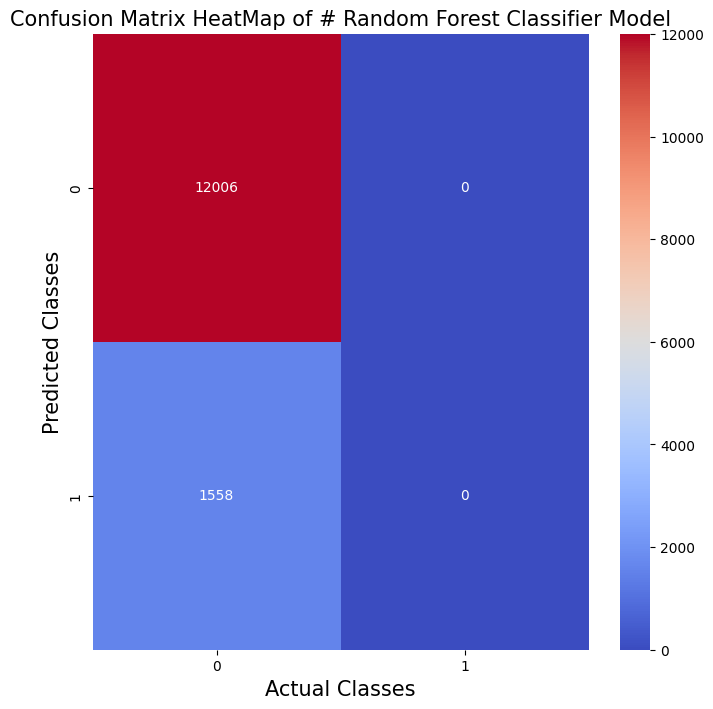

In [56]:
rf = RandomForestClassifier(criterion = 'entropy', random_state = 10, max_depth = 5, max_leaf_nodes = 5)
rf.fit(x_train,y_train)

print("Accuracy score of training data: {}".format(rf.score(x_train, y_train)))
print("Accuracy score of testing data: {}".format(rf.score(x_test, y_test)))

y_true = y_test
y_pred = rf.predict(x_test)

cfm = confusion_matrix(y_true, y_pred)
score = accuracy_score(y_true, y_pred)
print('\nMean Absolute Error of AdaBoost Classification Model:\n', mean_absolute_error(y_test, y_pred))
print("\nClassification report\n{}\n\n".format(classification_report(y_true, y_pred)))
print("\nConfusion matrix\n{}\n\n".format(cfm))
print("\nAccuracy Score\n {}\n\n".format(accuracy_score(y_true, y_pred)))

plt.figure(figsize = (8,8))
sns.heatmap(cfm, annot = True, cmap = 'coolwarm', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of # Random Forest Classifier Model', fontsize = 15)

In [57]:
precision_score_rf, recall_rf, f1_score_rf, support = precision_recall_fscore_support(y_true, y_pred, average = 'macro')
print("Precision Score: {:.2f}".format(precision_score_rf))
print("Recall score: {:.2f}".format(recall_rf))
print("F1 Score: {:.2f}".format(f1_score_rf))
print("Accuracy Score: {:.2f}".format(accuracy_score(y_true, y_pred)))

Precision Score: 0.44
Recall score: 0.50
F1 Score: 0.47
Accuracy Score: 0.89


           Feature Importance
marital              0.000000
default              0.000000
day                  0.000000
job                  0.000341
campaign             0.001364
education            0.001737
loan                 0.002407
balance              0.003892
month                0.029471
age                  0.033132
previous             0.043452
housing              0.070581
pdays                0.084182
contact              0.104678
poutcome             0.151315
duration             0.473448


Text(0.5, 1.0, 'Determining Feature Improtance with Random Forest Classifier')

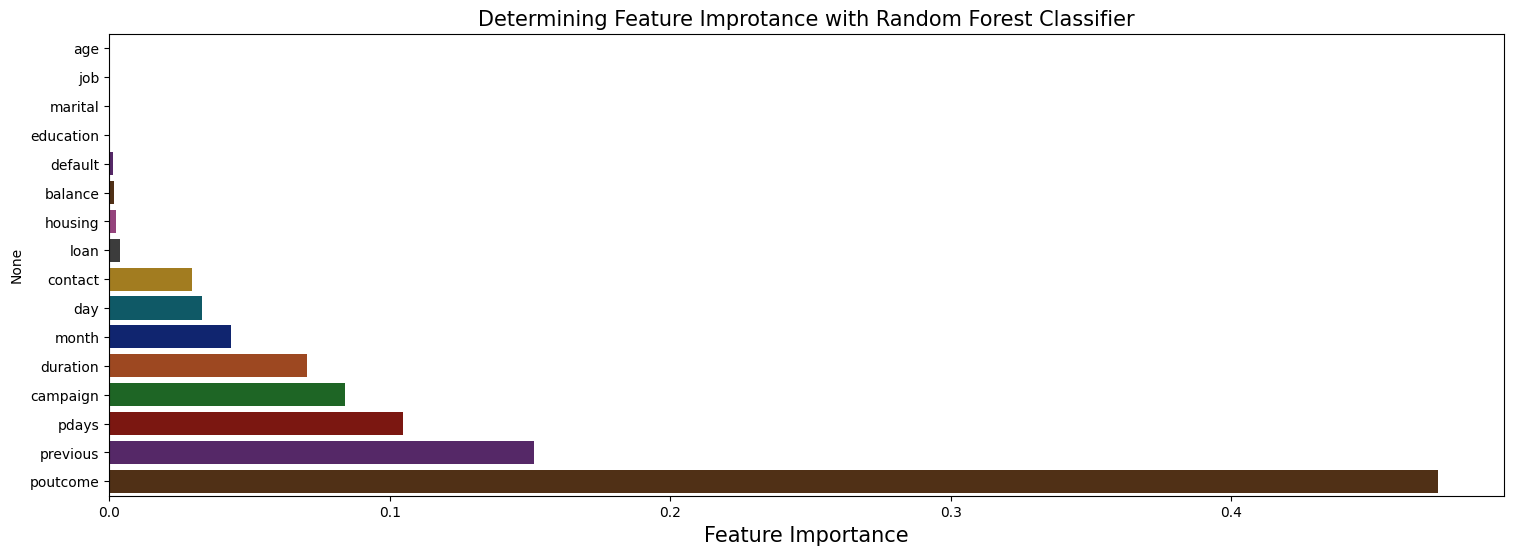

In [58]:
firf = pd.DataFrame(rf.feature_importances_, columns = ['Feature Importance'], index = xcol)
fi_rf = firf.sort_values(by = 'Feature Importance', ascending = True)
print(fi_rf)

plt.figure(figsize = (18,6))
sns.barplot(x = fi_rf['Feature Importance'], y = x_train.columns, palette = 'dark')
plt.xlabel('Feature Importance', fontsize = 15)
plt.title('Determining Feature Improtance with Random Forest Classifier', fontsize = 15)

Accuracy score of training data: 0.9614813410433848
Accuracy score of testing data: 0.9096874078442937

Mean Absolute Error of AdaBoost Classification Model:
 0.09031259215570628

Classification report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12006
           1       0.63      0.50      0.56      1558

    accuracy                           0.91     13564
   macro avg       0.79      0.73      0.76     13564
weighted avg       0.90      0.91      0.91     13564




Confusion matrix
[[11554   452]
 [  773   785]]



Accuracy Score
 0.9096874078442937




Text(0.5, 1.0, 'Confusion Matrix HeatMap of XG Boost Classifier Model')

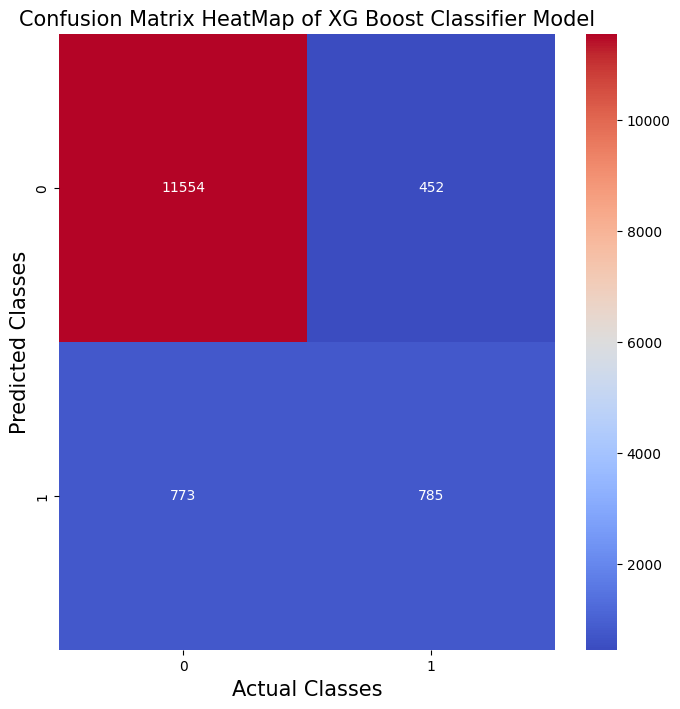

In [59]:
xg = XGBClassifier(max_depth = 5, n_estimators = 200)
xg.fit(x_train,y_train)

print("Accuracy score of training data: {}".format(xg.score(x_train, y_train)))
print("Accuracy score of testing data: {}".format(xg.score(x_test, y_test)))

y_true = y_test
y_pred = xg.predict(x_test)

cfm = confusion_matrix(y_true, y_pred)
score = accuracy_score(y_true, y_pred)
print('\nMean Absolute Error of AdaBoost Classification Model:\n', mean_absolute_error(y_test, y_pred))
print("\nClassification report\n{}\n\n".format(classification_report(y_true, y_pred)))
print("\nConfusion matrix\n{}\n\n".format(cfm))
print("\nAccuracy Score\n {}\n\n".format(accuracy_score(y_true, y_pred)))

plt.figure(figsize = (8,8))
sns.heatmap(cfm, annot = True, cmap = 'coolwarm', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of XG Boost Classifier Model', fontsize = 15)

In [60]:
precision_score_xg, recall_xg, f1_score_xg, support = precision_recall_fscore_support(y_true, y_pred, average = 'macro')
print("Precision Score: {:.2f}".format(precision_score_xg))
print("Recall score: {:.2f}".format(recall_xg))
print("F1 Score: {:.2f}".format(f1_score_xg))
print("Accuracy Score: {:.2f}".format(accuracy_score(y_true, y_pred)))

Precision Score: 0.79
Recall score: 0.73
F1 Score: 0.76
Accuracy Score: 0.91


           Feature Importance
marital              0.000000
default              0.000000
day                  0.000000
job                  0.000341
campaign             0.001364
education            0.001737
loan                 0.002407
balance              0.003892
month                0.029471
age                  0.033132
previous             0.043452
housing              0.070581
pdays                0.084182
contact              0.104678
poutcome             0.151315
duration             0.473448


Text(0.5, 1.0, 'Determining Feature Improtance with XG Boost Classifier ')

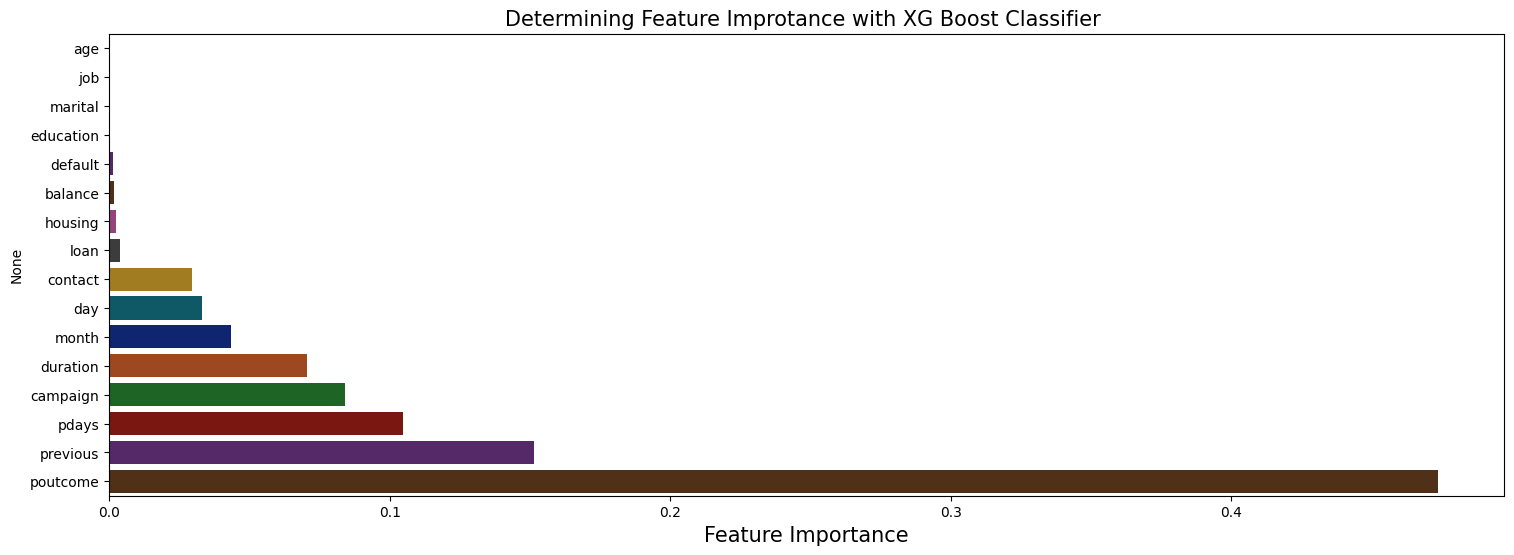

In [61]:
fixg = pd.DataFrame(xg.feature_importances_, columns = ['Feature Importance'], index = xcol)
fi_xg = firf.sort_values(by = 'Feature Importance', ascending = True)
print(fi_xg)

plt.figure(figsize = (18,6))
sns.barplot(x = fi_rf['Feature Importance'], y = x_train.columns, palette = 'dark')
plt.xlabel('Feature Importance', fontsize = 15)
plt.title('Determining Feature Improtance with XG Boost Classifier ', fontsize = 15)

# Gradient Boosting Classifier

Accuracy score of training data: 0.9398363193983632
Accuracy score of testing data: 0.9102034797994691

Mean Absolute Error of AdaBoost Classification Model:
 0.08979652020053082

Classification report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12006
           1       0.65      0.48      0.55      1558

    accuracy                           0.91     13564
   macro avg       0.79      0.72      0.75     13564
weighted avg       0.90      0.91      0.90     13564




Confusion matrix
[[11600   406]
 [  812   746]]



Accuracy Score
 0.9102034797994691




Text(0.5, 1.0, 'Confusion Matrix HeatMap of Gradient Boosting Classifier Model')

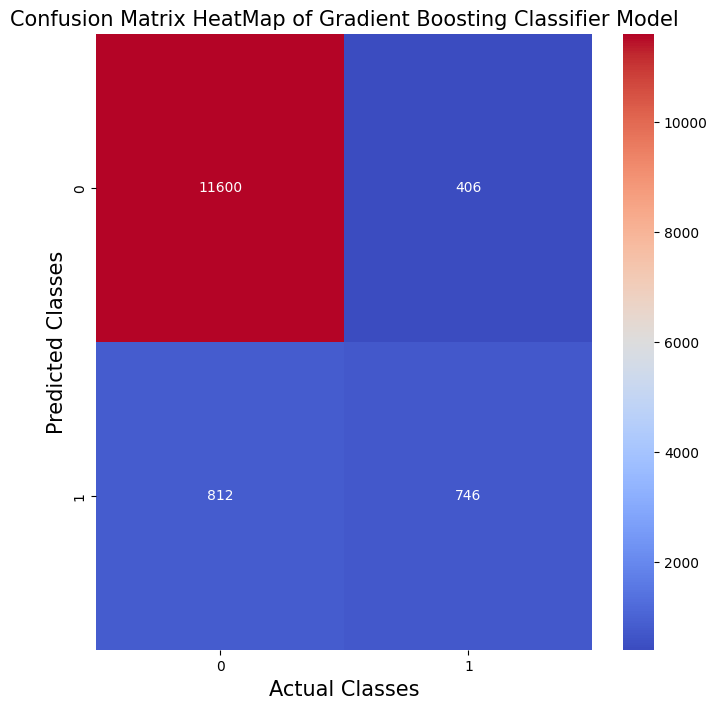

In [63]:
gbc = GradientBoostingClassifier(max_depth = 5, min_samples_leaf = 5, n_estimators = 200) 
gbc.fit(x_train,y_train)

print("Accuracy score of training data: {}".format(gbc.score(x_train, y_train)))
print("Accuracy score of testing data: {}".format(gbc.score(x_test, y_test)))

y_true = y_test
y_pred = gbc.predict(x_test)

cfm = confusion_matrix(y_true, y_pred)
score = accuracy_score(y_true, y_pred)
print('\nMean Absolute Error of AdaBoost Classification Model:\n', mean_absolute_error(y_test, y_pred))
print("\nClassification report\n{}\n\n".format(classification_report(y_true, y_pred)))
print("\nConfusion matrix\n{}\n\n".format(cfm))
print("\nAccuracy Score\n {}\n\n".format(accuracy_score(y_true, y_pred)))

plt.figure(figsize = (8,8))
sns.heatmap(cfm, annot = True, cmap = 'coolwarm', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of Gradient Boosting Classifier Model', fontsize = 15)

In [64]:
precision_score_gbc, recall_gbc, f1_score_gbc, support = precision_recall_fscore_support(y_true, y_pred, average = 'macro')
print("Precision Score: {:.2f}".format(precision_score_gbc))
print("Recall score: {:.2f}".format(recall_gbc))
print("F1 Score: {:.2f}".format(f1_score_gbc))
print("Accuracy Score: {:.2f}".format(accuracy_score(y_true, y_pred)))

Precision Score: 0.79
Recall score: 0.72
F1 Score: 0.75
Accuracy Score: 0.91


           Feature Importance
marital              0.000000
default              0.000000
day                  0.000000
job                  0.000341
campaign             0.001364
education            0.001737
loan                 0.002407
balance              0.003892
month                0.029471
age                  0.033132
previous             0.043452
housing              0.070581
pdays                0.084182
contact              0.104678
poutcome             0.151315
duration             0.473448


Text(0.5, 1.0, 'Determining Feature Improtance with Decision Tree Classifier')

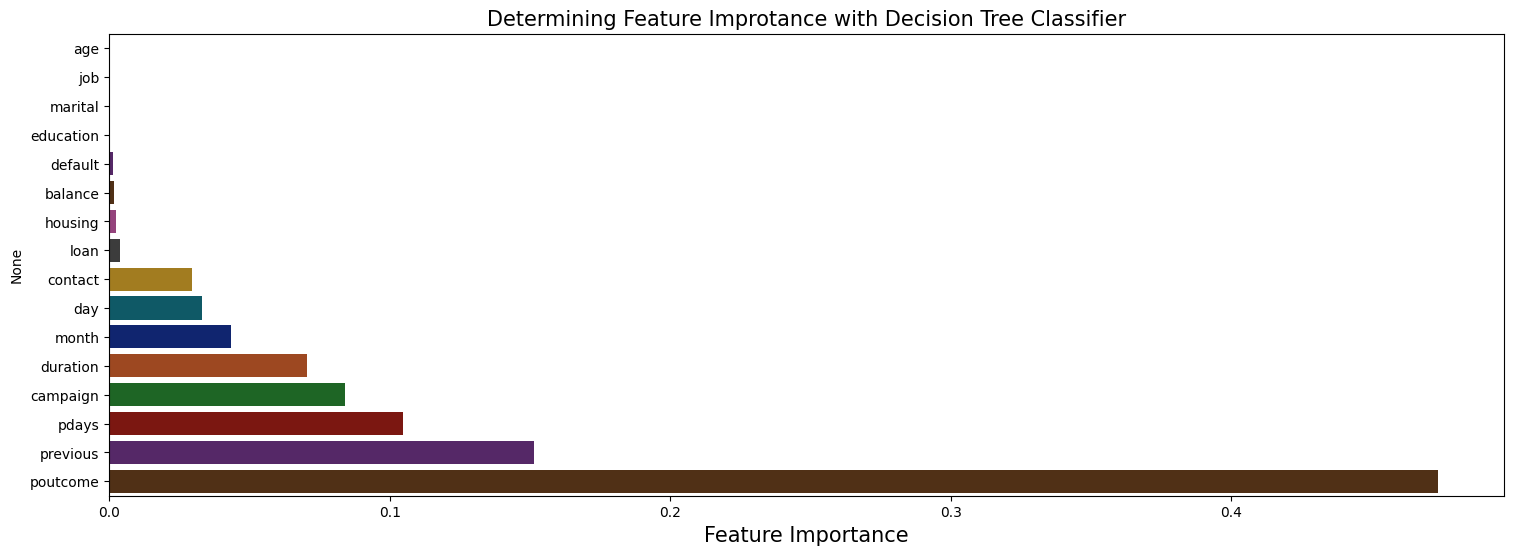

In [65]:
figbc = pd.DataFrame(gbc.feature_importances_, columns = ['Feature Importance'], index = xcol)
fi_rf = firf.sort_values(by = 'Feature Importance', ascending = True)
print(fi_rf)

plt.figure(figsize = (18,6))
sns.barplot(x = fi_rf['Feature Importance'], y = x_train.columns, palette = 'dark')
plt.xlabel('Feature Importance', fontsize = 15)
plt.title('Determining Feature Improtance with Decision Tree Classifier', fontsize = 15)

In [66]:
models = []
models.append(['Gaussian NB', score_train * 100, score * 100, recall_nb * 100, precision_score_nb * 100])
models.append(['Logistic Regression', score_train * 100, score * 100, recall_lr * 100, precision_score_lr * 100])
models.append(['SVC', score_train * 100, score * 100, recall_svc * 100, precision_score_svc * 100])
models.append(['KNN', score_train * 100, score * 100, recall_knn * 100, precision_score_knn * 100])
models.append(['Decision Tree Classifier', score_train * 100, score * 100, recall_dt * 100, precision_score_dt * 100])
models.append(['ADA Boost Classifier', score_train * 100, score * 100, recall_abc * 100, precision_score_abc * 100])
models.append(['Gradient Boost Classifier', score_train * 100, score * 100, recall_gbc * 100, precision_score_gbc * 100])
models.append(['Random Forest Classifier', score_train * 100, score * 100, recall_rf * 100, precision_score_rf * 100])
models.append(['XG Boost Classifier', score_train * 100, score * 100, recall_xg * 100, precision_score_xg * 100])
mdl_df = pd.DataFrame(models, columns = ['Model', 'Train Score', 'Test Score', 'Recall Score', 'Precision Score'])
mdl_df

,Model,Train Score,Test Score,Recall Score,Precision Score
0,Gaussian NB,89.423958,91.020348,66.677952,64.715331
1,Logistic Regression,89.423958,91.020348,63.988241,74.529713
2,SVC,89.423958,91.020348,63.988241,74.529713
3,KNN,89.423958,91.020348,60.534415,78.269059
4,Decision Tree Classifier,89.423958,91.020348,61.733356,75.586468
5,ADA Boost Classifier,89.423958,91.020348,71.267036,74.934389
6,Gradient Boost Classifier,89.423958,91.020348,72.250129,79.107444
7,Random Forest Classifier,89.423958,91.020348,50.000000,44.256856
8,XG Boost Classifier,89.423958,91.020348,73.310162,78.594598


Text(0.5, 1.0, 'Comparison of Classification Models')

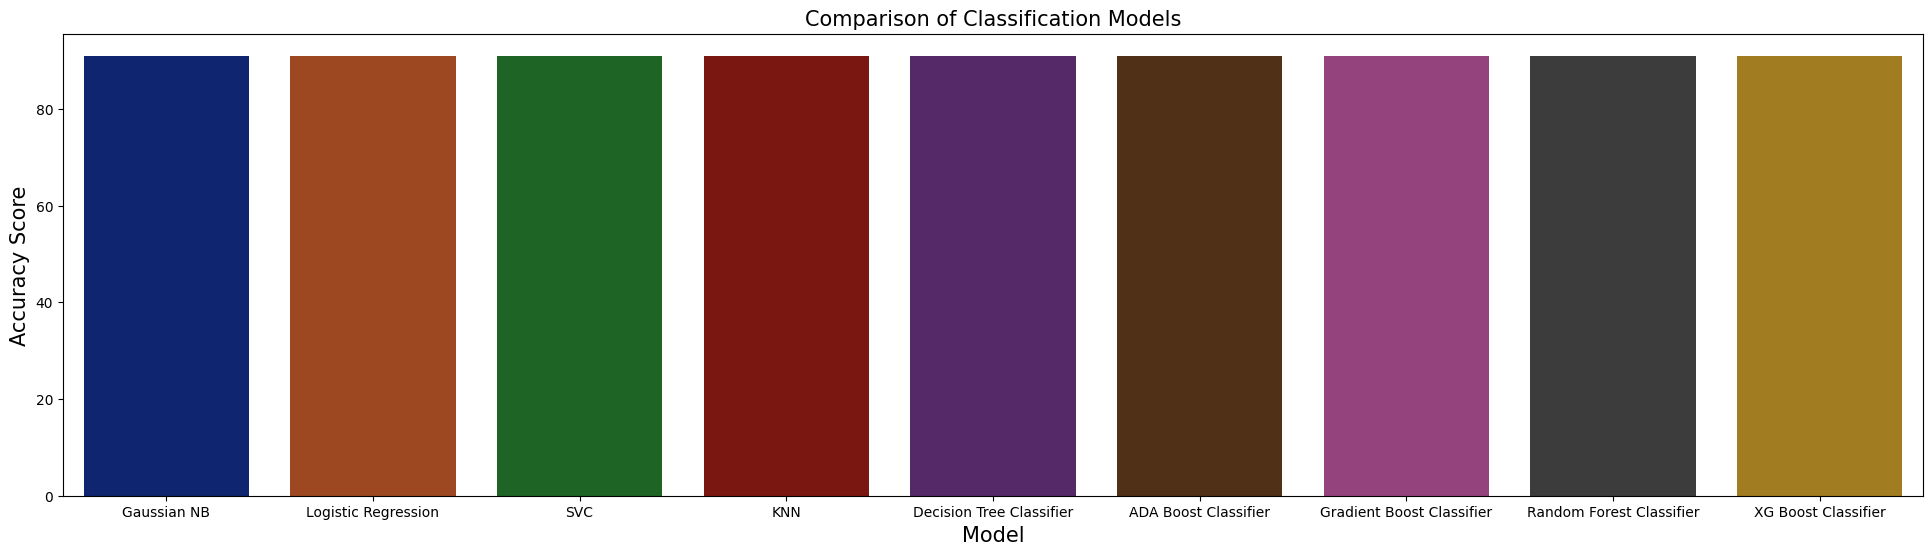

In [67]:
plt.figure(figsize = (24,6))
sns.barplot(x = mdl_df['Model'], y = mdl_df['Test Score'], palette = 'dark', data = mdl_df)
plt.xlabel('Model', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Comparison of Classification Models', fontsize = 15)